# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [2]:
# Import data

client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

In [3]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
# Convert date columns to datetime format
client_df_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for col in client_df_columns:
    client_df[col] = pd.to_datetime(client_df[col])


In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [8]:
# Convert date columns to datetime format
price_df_columns = ['price_date']
for col in price_df_columns:
    price_df[col] = pd.to_datetime(price_df[col])

In [9]:
client_df.columns.values

array(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype=object)

In [10]:
# Ensure numeric columns are appropriately typed
numeric_columns_1 = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin',
                  'num_years_antig', 'pow_max', 'churn' ]
for col in numeric_columns_1:
    client_df[col] = pd.to_numeric(client_df[col])

In [11]:
price_df.columns.values

array(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'], dtype=object)

In [12]:
# Ensure numeric columns are appropriately typed
numeric_columns_2 = ['price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix' ]
for col in numeric_columns_2:
    price_df[col] = pd.to_numeric(price_df[col])

### Statistics

Now let's look at some statistics about the datasets.

In [13]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [14]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

In [15]:
import numpy as np

### Explore clients information

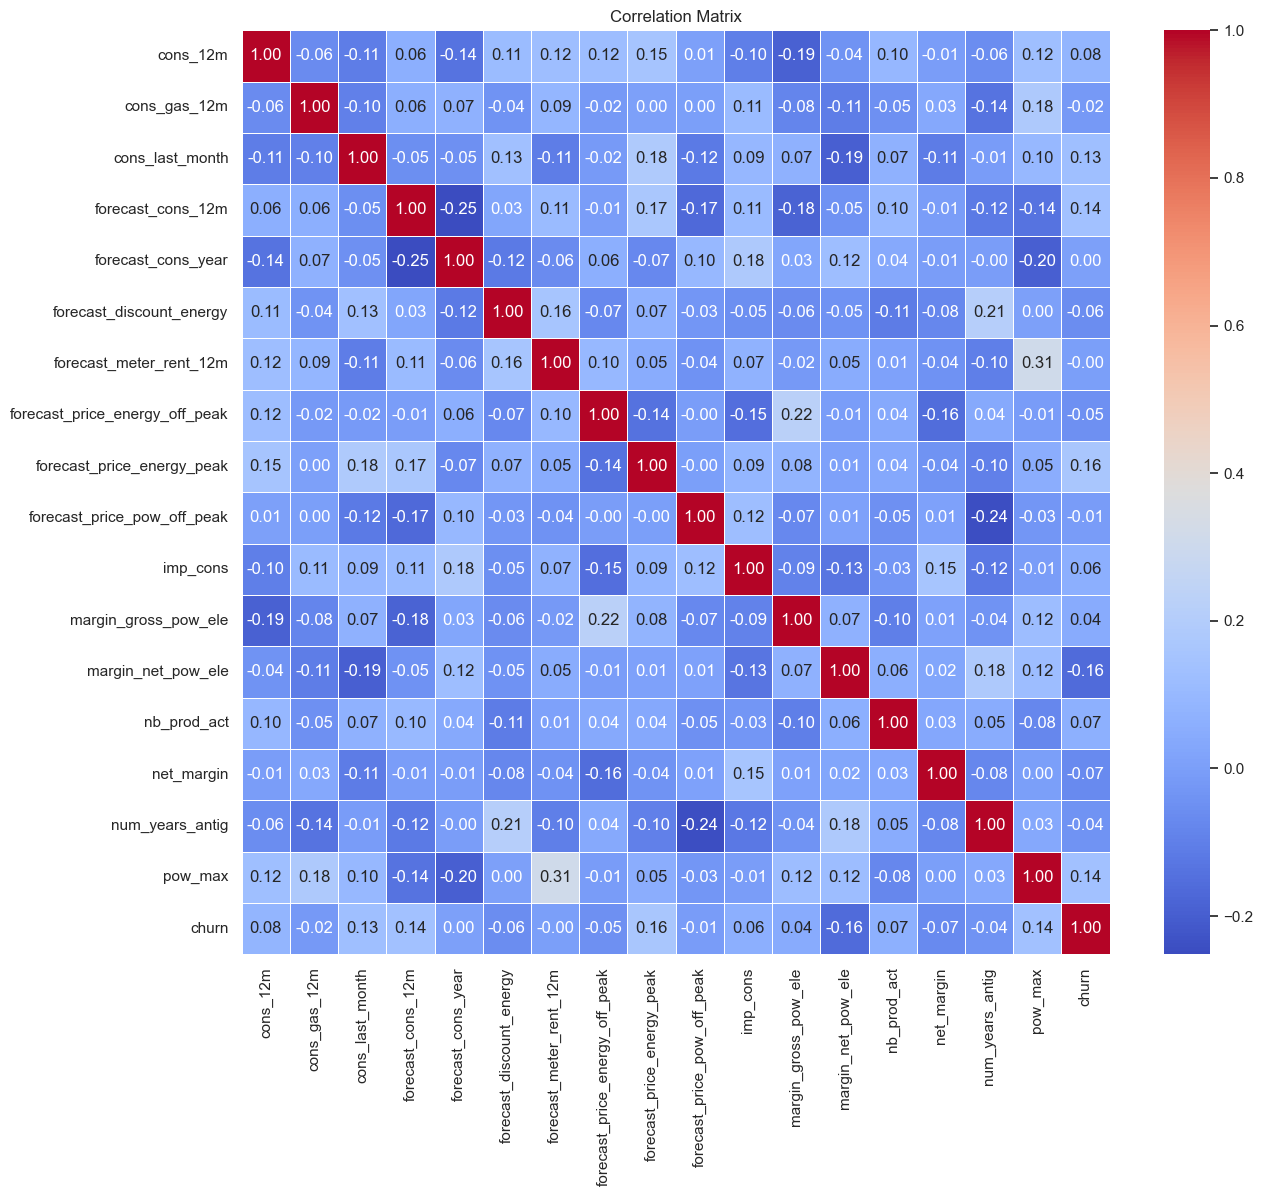

In [16]:
data = {
    'cons_12m': np.random.rand(100),
    'cons_gas_12m': np.random.rand(100),
    'cons_last_month': np.random.rand(100),
    'forecast_cons_12m': np.random.rand(100),
    'forecast_cons_year': np.random.rand(100),
    'forecast_discount_energy': np.random.rand(100),
    'forecast_meter_rent_12m': np.random.rand(100),
    'forecast_price_energy_off_peak': np.random.rand(100),
    'forecast_price_energy_peak': np.random.rand(100),
    'forecast_price_pow_off_peak': np.random.rand(100),
    'imp_cons': np.random.rand(100),
    'margin_gross_pow_ele': np.random.rand(100),
    'margin_net_pow_ele': np.random.rand(100),
    'nb_prod_act': np.random.rand(100),
    'net_margin': np.random.rand(100),
    'num_years_antig': np.random.rand(100),
    'pow_max': np.random.rand(100),
    'churn': np.random.randint(0, 2, 100)
}

df = pd.DataFrame(data)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Insigts: Strong Predictors: forecast_meter_rent_12m, num_years_antig, and pow_max show the highest correlations with churn, though they are still relatively weak. These features should be considered in predictive models.
	Cost Sensitivity: The correlation between forecast_meter_rent_12m and churn suggests that customers might be sensitive to price increases. Investigating pricing strategies and customer segmentation based on cost sensitivity could provide more insights.
	Customer Loyalty: The negative correlation between num_years_antig and churn indicates that longer-tenured customers are more loyal. Strategies to increase customer tenure and loyalty programs might help reduce churn.

In [37]:
# Example feature engineering

client_df['customer_tenure'] = (client_df['date_end'] - client_df['date_activ']).dt.days
client_df['avg_monthly_consumption'] = client_df['cons_12m'] / 12

In [38]:
# Segment customers based on key features

clients_segments = pd.qcut(client_df['cons_12m'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
client_df['consumption_segment'] = clients_segments
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,customer_tenure,avg_monthly_consumption,consumption_segment
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,1096,0.000000,Low
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,2566,388.333333,Low
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,2192,45.333333,Low
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,2192,132.000000,Low
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,2245,368.750000,Low


In [39]:
# Analyze churn rates within each segment

churn_rates = client_df.groupby('consumption_segment')['churn'].mean()
print(churn_rates)

consumption_segment
Low          0.093373
Medium       0.098329
High         0.099699
Very High    0.097207
Name: churn, dtype: float64


The churn rates across the different consumption segments are relatively consistent, with values ranging between approximately 9.34% and 9.97%. This indicates that churn is not heavily dependent on the consumption level.

### Client channels

In [48]:
# Inspect the channel_sales column
# Rename channels for convinience
channel_renames = {
    'foosdfpfkusacimwkcsosbicdxkicaua': 'Channel 1',
    'MISSING': 'Channel 2',
    'lmkebamcaaclubfxadlmueccxoimlema': 'Channel 3',
    'usilxuppasemubllopkaafesmlibmsdf': 'Channel 4',
    'ewpakwlliwisiwduibdlfmalxowmwpci': 'Channel 5',
    'sddiedcslfslkckwlfkdpoeeailfpeds': 'Channel 6',
    'epumfxlbckeskwekxbiuasklxalciiuu': 'Channel 7',
    'fixdbufsefwooaasfcxdxadsiekoceaa': 'Channel 8'
}

client_df['channel_sales'] = client_df['channel_sales'].replace(channel_renames)

print(client_df['channel_sales'].value_counts())
print(client_df['channel_sales'].isnull().sum())

Channel 1    6754
Channel 2    3725
Channel 3    1843
Channel 4    1375
Channel 5     893
Channel 6      11
Channel 7       3
Channel 8       2
Name: channel_sales, dtype: int64
0


In [49]:
# Descriptive statistics for channel_sales

channel_sales_distribution = client_df['channel_sales'].value_counts(normalize=True) * 100
print(channel_sales_distribution)

Channel 1    46.241271
Channel 2    25.503218
Channel 3    12.618102
Channel 4     9.413939
Channel 5     6.113926
Channel 6     0.075312
Channel 7     0.020540
Channel 8     0.013693
Name: channel_sales, dtype: float64


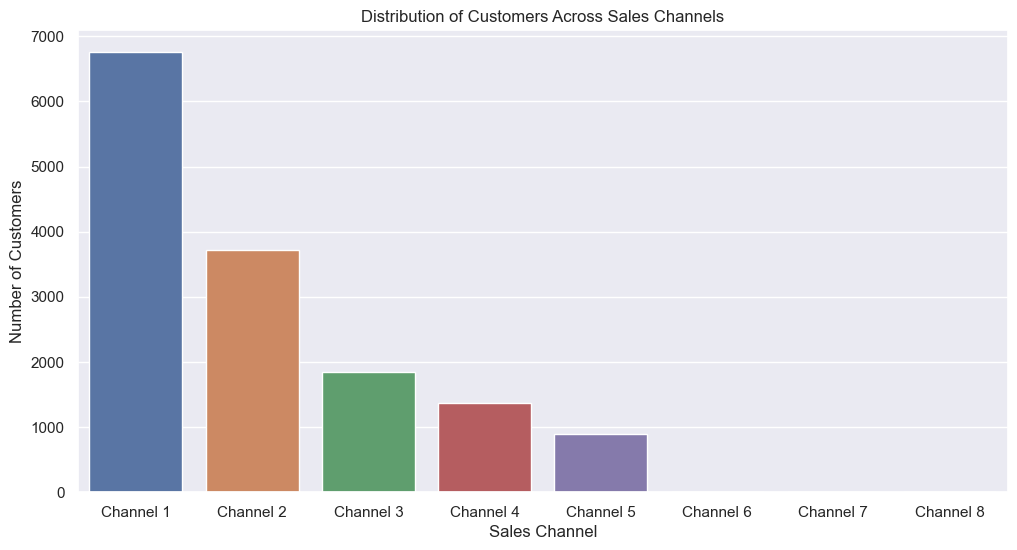

In [50]:
# Visualization
plt.figure(figsize=(12, 6))
sns.countplot(x='channel_sales', data=client_df, order=client_df['channel_sales'].value_counts().index)
plt.title('Distribution of Customers Across Sales Channels')
plt.xlabel('Sales Channel')
plt.ylabel('Number of Customers')
plt.show()

channel_sales
Channel 1    12.140954
Channel 2     7.597315
Channel 3     5.588714
Channel 4    10.036364
Channel 5     8.398656
Channel 6     0.000000
Channel 7     0.000000
Channel 8     0.000000
Name: churn, dtype: float64


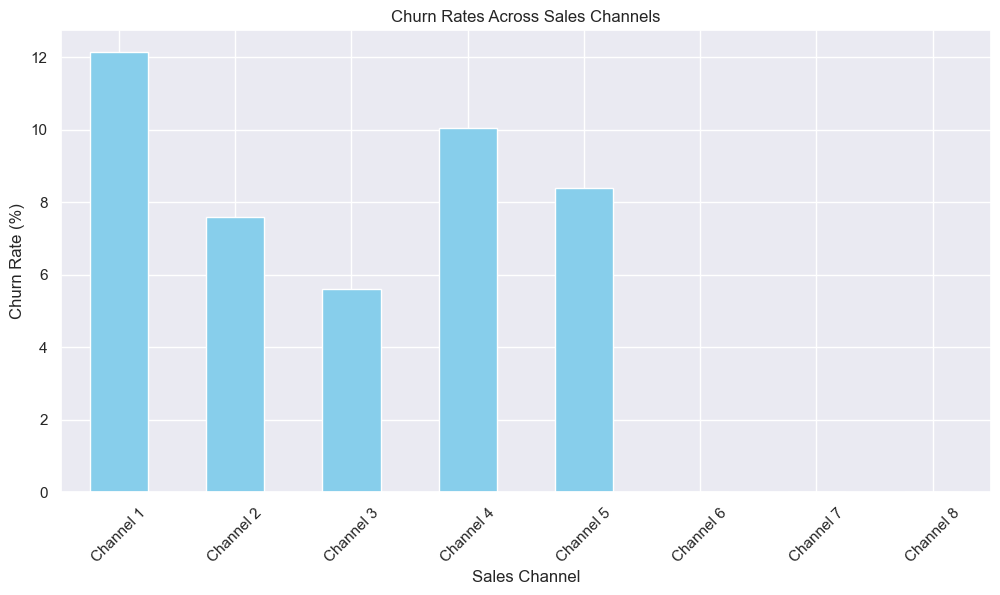

In [51]:
# Churn analysis by sales channel
churn_by_channel = client_df.groupby('channel_sales')['churn'].mean() * 100
print(churn_by_channel)

plt.figure(figsize=(12, 6))
churn_by_channel.plot(kind='bar', color='skyblue')
plt.title('Churn Rates Across Sales Channels')
plt.xlabel('Sales Channel')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()

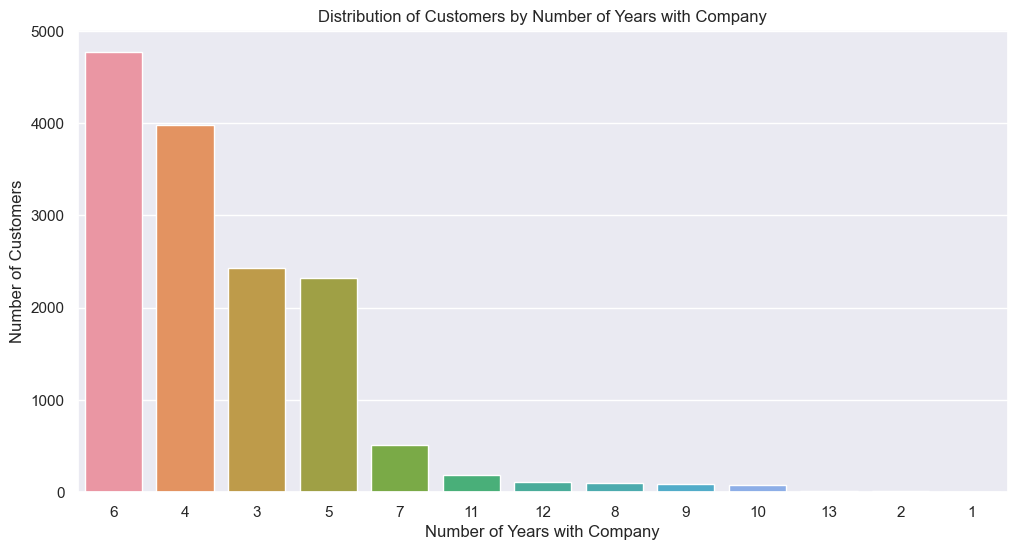

In [53]:
# Visualization: Distribution of Customers by Number of Years with Company

plt.figure(figsize=(12, 6))
sns.countplot(x='num_years_antig', data=client_df, order=client_df['num_years_antig'].value_counts().index)
plt.title('Distribution of Customers by Number of Years with Company')
plt.xlabel('Number of Years with Company')
plt.ylabel('Number of Customers')
plt.show()

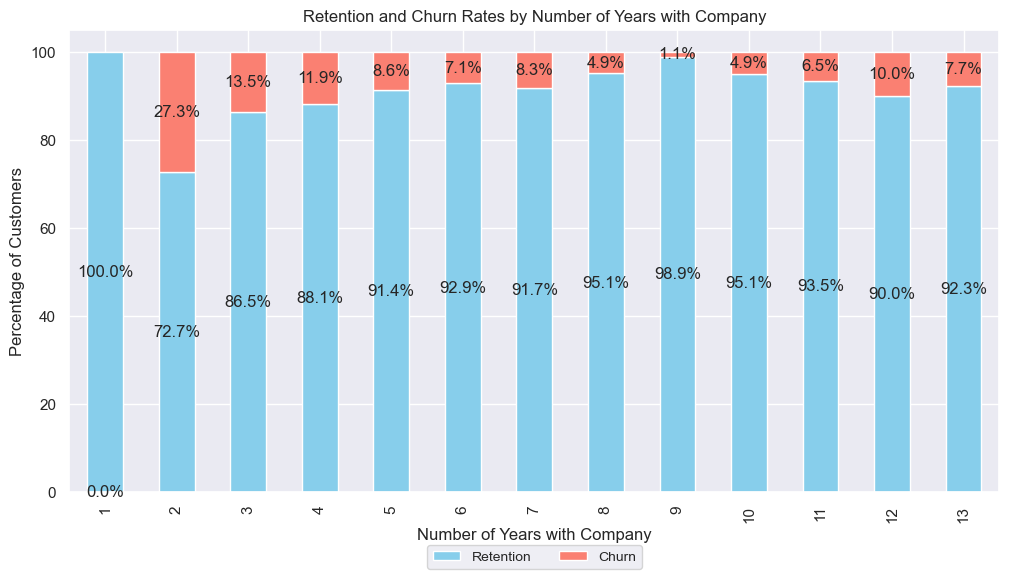

In [61]:
# Group by number of years and churn status
years_antig = client_df.groupby(['num_years_antig', 'churn'])['id'].count().unstack(level=1, fill_value=0)
years_antig_percentage = years_antig.div(years_antig.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
years_antig_percentage.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'salmon'])
ax.set_xlabel('Number of Years with Company')
ax.set_ylabel('Percentage of Customers')
ax.set_title('Retention and Churn Rates by Number of Years with Company')
ax.legend(['Retention', 'Churn'], fontsize='small', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Add percentage labels to bars
for c in ax.containers:
    labels = [f'{v.get_height():.1f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()


In [62]:
# Calculate skewness for each margin column
skewness_gross = client_df['margin_gross_pow_ele'].skew()
skewness_net = client_df['margin_net_pow_ele'].skew()
skewness_net_margin = client_df['net_margin'].skew()

print(f"Skewness of margin_gross_pow_ele: {skewness_gross:.2f}")
print(f"Skewness of margin_net_pow_ele: {skewness_net:.2f}")
print(f"Skewness of net_margin: {skewness_net_margin:.2f}")

Skewness of margin_gross_pow_ele: 4.47
Skewness of margin_net_pow_ele: 4.47
Skewness of net_margin: 36.57


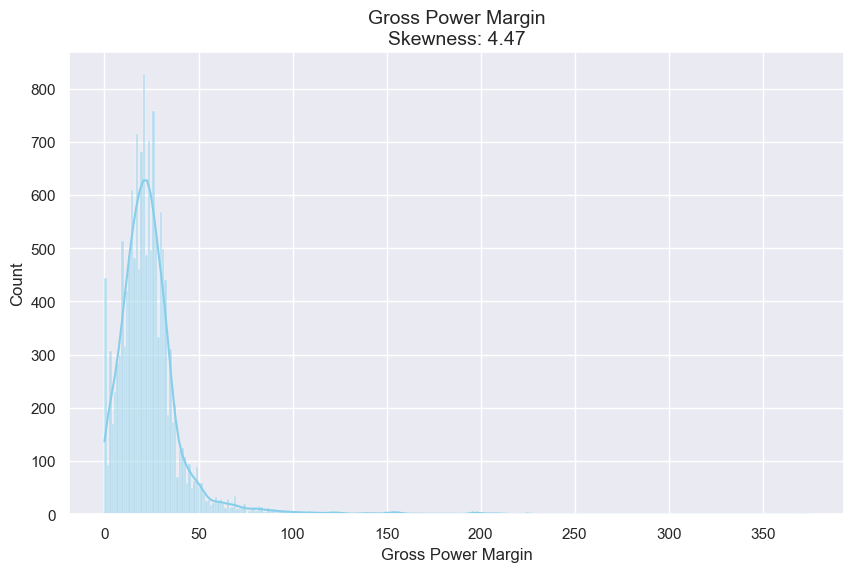

In [79]:
# Gross Power Margin
plt.figure(figsize=(10, 6))
sns.histplot(client_df['margin_gross_pow_ele'], kde=True, color='skyblue')
plt.title(f"Gross Power Margin\nSkewness: {skewness_gross:.2f}", fontsize=14)
plt.xlabel('Gross Power Margin', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.show()

A few customers have significantly higher gross power margins compared to the rest. These outliers can heavily influence the mean and may require special attention in the analysis.


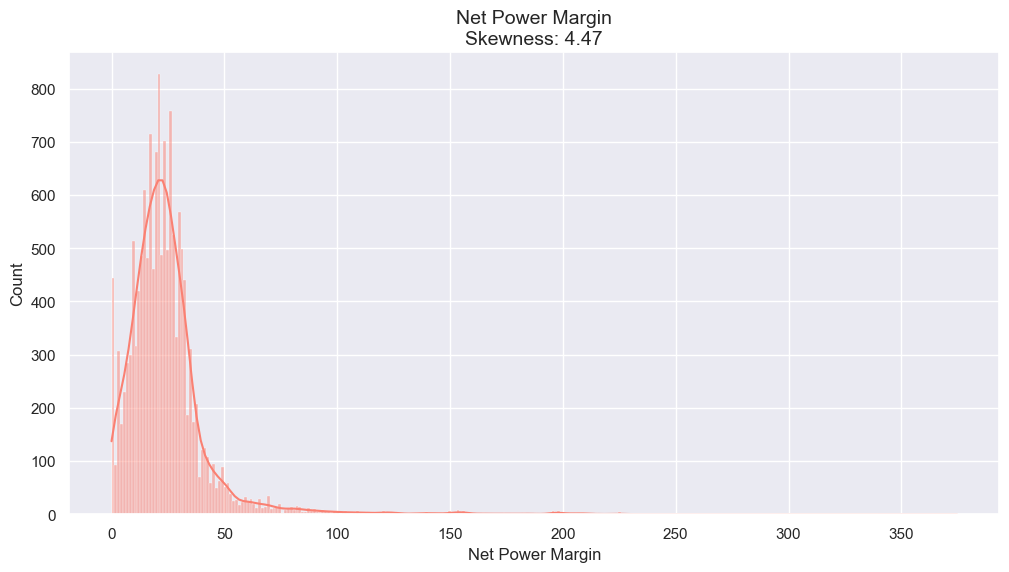

In [80]:
# Net Power Margin
plt.figure(figsize=(12, 6))
sns.histplot(client_df['margin_net_pow_ele'], kde=True, color='salmon')
plt.title(f"Net Power Margin\nSkewness: {skewness_net:.2f}", fontsize=14)
plt.xlabel('Net Power Margin', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.show()

There are a few customers with very high net power margins, suggesting the presence of significant outliers. This indicates that while most customers have relatively low net power margins, a small number of customers contribute disproportionately to the total margin.


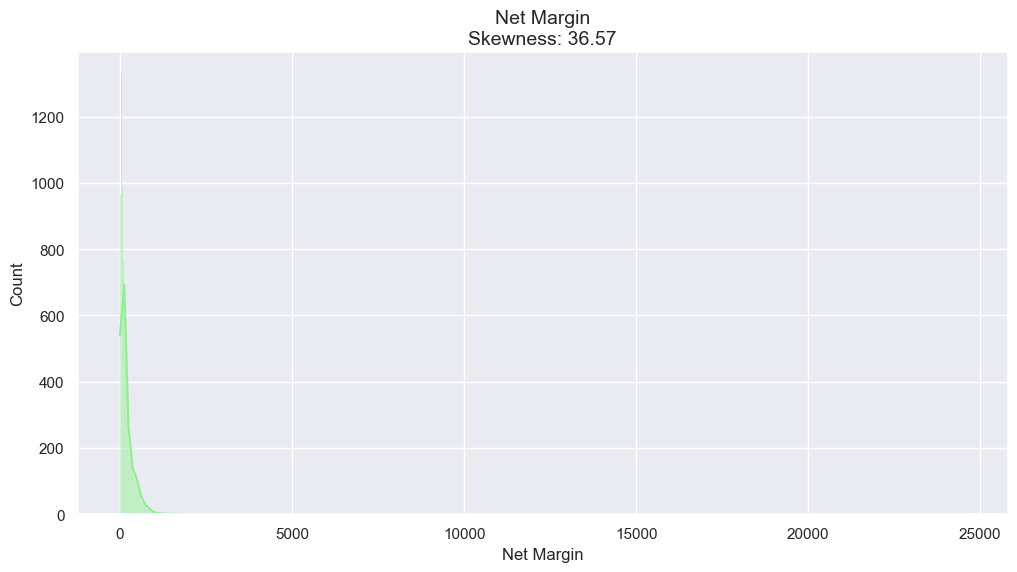

In [82]:
# Net Margin
plt.figure(figsize=(12, 6))
sns.histplot(client_df['net_margin'], kde=True, color='lightgreen')
plt.title(f"Net Margin\nSkewness: {skewness_net_margin:.2f}", fontsize=14)
plt.xlabel('Net Margin', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.show()

The presence of extreme outliers in the net_margin data suggests that a very small number of customers have extraordinarily high net margins. This extreme skewness can significantly distort statistical analyses and may require the use of robust statistical methods or transformations to mitigate the influence of these outliers.

### Lets look deeper into prices

In [34]:
# Group data by month and calculate mean prices for each month

df_grouped = price_df.groupby(price_df['price_date'].dt.to_period('M')).mean()
df_grouped

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,price_off_peak_var_ma,price_peak_var_ma,price_mid_peak_var_ma,price_off_peak_fix_ma,price_peak_fix_ma,price_mid_peak_fix_ma
price_date,,,,,,,,,,,,
2015-01,0.142568,0.054950,0.030333,43.226643,10.692921,6.455861,0.139502,0.054186,0.030606,43.387184,10.662356,6.435812
2015-02,0.142767,0.055053,0.030367,43.238161,10.673719,6.449016,0.141115,0.054653,0.030476,43.321560,10.668897,6.443715
2015-03,0.143104,0.055118,0.030396,43.254033,10.644489,6.430121,0.142814,0.055034,0.030356,43.237027,10.665747,6.443840
2015-04,0.143259,0.056035,0.030492,43.288439,10.647277,6.423156,0.143039,0.055394,0.030419,43.261348,10.655982,6.433683
2015-05,0.143534,0.055359,0.030393,43.315388,10.602453,6.390806,0.143301,0.055498,0.030421,43.287756,10.630353,6.412771
2015-06,0.143731,0.055255,0.029902,43.347320,10.415769,6.281304,0.143505,0.055555,0.030267,43.317197,10.557034,6.366158
2015-07,0.143683,0.055369,0.030636,43.345012,10.642236,6.421464,0.143646,0.055332,0.030315,43.334898,10.554253,6.365907
2015-08,0.137933,0.053605,0.030717,43.365366,10.661678,6.431518,0.141781,0.054743,0.030419,43.352746,10.573683,6.378248
2015-09,0.137933,0.053532,0.030606,43.351874,10.602979,6.391788,0.139852,0.054152,0.030642,43.355103,10.632214,6.412034


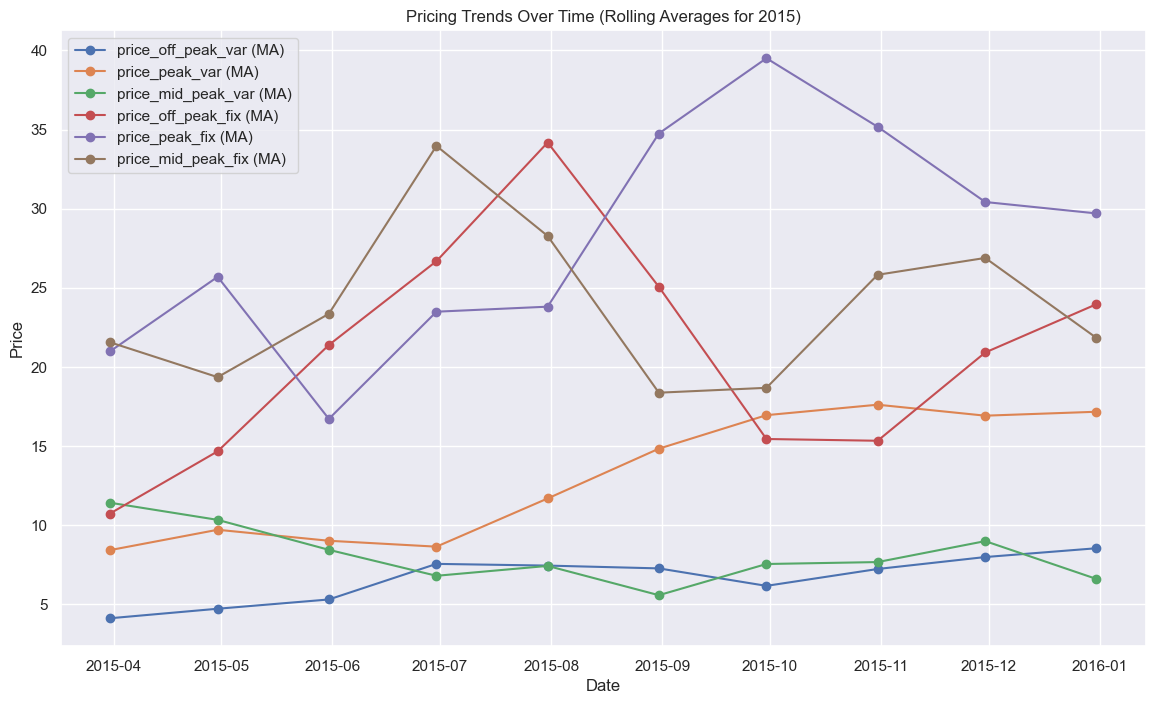

In [33]:
dates = pd.date_range(start='2015-01-01', end='2015-12-31', freq='M')
num_records = len(dates)

data = {
    'price_date': dates,
    'price_off_peak_var': np.random.rand(num_records) * 10,
    'price_peak_var': np.random.rand(num_records) * 20,
    'price_mid_peak_var': np.random.rand(num_records) * 15,
    'price_off_peak_fix': np.random.rand(num_records) * 50,
    'price_peak_fix': np.random.rand(num_records) * 60,
    'price_mid_peak_fix': np.random.rand(num_records) * 40
}
df = pd.DataFrame(data)

# Convert date columns to datetime format
df['price_date'] = pd.to_datetime(df['price_date'])

# Calculate and plot rolling averages
plt.figure(figsize=(14, 8))
for col in df.columns[1:]:
    df[f'{col}_ma'] = df[col].rolling(window=3).mean()  # Example: 3-period moving average
    plt.plot(df['price_date'], df[f'{col}_ma'], label=f'{col} (MA)', marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Pricing Trends Over Time (Rolling Averages for 2015)')
plt.legend()
plt.show()


    We can observe Seasonal Trends:	There is a noticeable increase in both fixed and variable prices around mid-year (June to August). A second peak in fixed prices, particularly price_peak_fix, is observed towards the end of the year (November to December). The variable prices (price_off_peak_var, price_peak_var, price_mid_peak_var) are relatively stable with fewer fluctuations and lower values compared to fixed prices.
    Given the higher variability and peaks in fixed prices, it might be beneficial for PowerCo to closely monitor these prices and adjust them strategically to remain competitive and manage costs.
	Implementing predictive analytics could help forecast future price trends and make informed adjustments.

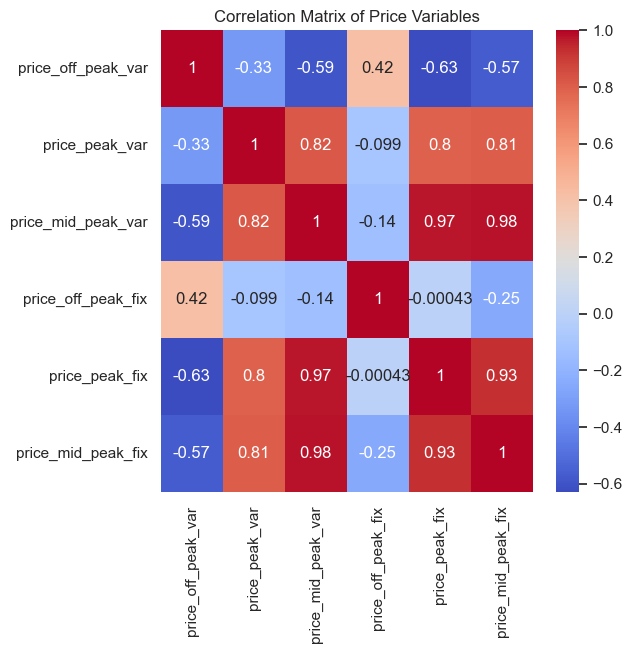

In [35]:
# Correlation analysis

corr_matrix = price_df[numeric_columns_2].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Price Variables')
plt.show()

The high correlations between fixed and variable prices for the same time periods (peak and mid-peak) suggest that changes in one can be used to predict changes in the other. For example, if variable mid-peak prices increase, we can expect fixed mid-peak prices to increase as well.

## Move to nexst steps